In [1]:
import os
import sys
import rootpath
sys.path.append(rootpath.detect())

import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from pymoo.factory import get_performance_indicator

In [2]:
## establish up data paths
results_dir = "./log_data/"
result_dirs = sorted(os.listdir("./log_data/"))

pkl_dir = "./pkl_data/"
pkl_filename = pkl_dir+'results.pkl'
if not os.path.isdir(pkl_dir):
    os.makedirs(pkl_dir)

In [3]:
try:
    with open(pkl_filename,'rb') as infile:
        results = pickle.load(infile)
    print("results loaded from ", pkl_dir)
except FileNotFoundError:
    print("Failed to find results file in {}".format(pkl_filename))
    print("Results processing should be done first by running results_processing.py")
    
try:
    assert len(results) == 7
    for result in results:
        assert len(result['log_dir']) ==31
        print(result['name'], ": All results present.")
except:
    print("not all results present")
    for result in results:
        print(result['name'], "\t", "({}\{})".format(len(result['log_dir']), 31))

results loaded from  ./pkl_data/
Mpoi : All results present.
ParEgo : All results present.
Saf_ei : All results present.
Saf_$\mu$ : All results present.
SmsEgo_ei : All results present.
SmsEgo_$\mu$ : All results present.
lhs : All results present.


In [32]:
p = np.load(os.path.join('/home/finley/phd/code/testsuite/experiments/template/igd+_refpoints', 'wfg_elipse_2d_refpoints'))
ref_point = np.round(p.max(axis=0))*1.1
ref_point

array([2.2, 4.4])

In [44]:
hv_measure = get_performance_indicator("hv", ref_point=ref_point)
igdp_measure = get_performance_indicator("igd+", p)

In [34]:
n_obj = p.shape[-1]
n_obj

2

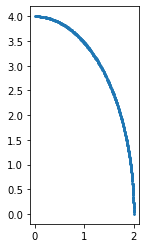

In [41]:
plt.scatter(*p[:1000].T, s=2)
plt.gca().set_aspect('equal')

In [45]:
D = {}
for result in tqdm(results):
    print(result['name'])
    y = np.array(result['y'])

    if result['name'] == 'lhs':
        hvs = np.zeros((y.shape[0], y.shape[1]+10))
        igdps = np.zeros((y.shape[0], y.shape[1]+10))
        for i, yi in tqdm(enumerate(y)):
            for j, yii in enumerate(yi):
                hvs[i, j+10] = hv_measure.calc(yii)
                igdps[i, j+10] = igdp_measure.calc(yii)
    else:
        hvs = np.zeros((y.shape[0], y.shape[1]))
        igdps = np.zeros((y.shape[0], y.shape[1]))
        for i, yi in tqdm(enumerate(y)):
            for j in range(1, y.shape[1]+1):
                hvs[i, j-1] = hv_measure.calc(yi[:j])
                igdps[i, j-1] = igdp_measure.calc(yi[:j])
                
    D[result['name']] = {'name':result['name'], 'hypervolume': hvs, 'igd+':igdps}

  0%|          | 0/7 [00:00<?, ?it/s]
0it [00:00, ?it/s]

Mpoi



1it [00:05,  5.13s/it]
2it [00:09,  4.98s/it]
3it [00:14,  4.95s/it]
4it [00:19,  4.96s/it]
5it [00:24,  4.88s/it]
6it [00:28,  4.80s/it]
7it [00:33,  4.74s/it]
8it [00:38,  4.76s/it]
9it [00:42,  4.73s/it]
10it [00:47,  4.64s/it]
11it [00:52,  4.65s/it]
12it [00:56,  4.56s/it]
13it [01:00,  4.55s/it]
14it [01:05,  4.60s/it]
15it [01:10,  4.55s/it]
16it [01:14,  4.52s/it]
17it [01:20,  4.84s/it]
18it [01:25,  4.85s/it]
19it [01:29,  4.74s/it]
20it [01:34,  4.67s/it]
21it [01:38,  4.66s/it]
22it [01:43,  4.71s/it]
23it [01:47,  4.61s/it]
24it [01:52,  4.58s/it]
25it [01:56,  4.59s/it]
26it [02:01,  4.71s/it]
27it [02:06,  4.69s/it]
28it [02:11,  4.69s/it]
29it [02:16,  4.86s/it]
30it [02:21,  4.76s/it]
31it [02:25,  4.69s/it]
 14%|█▍        | 1/7 [02:25<14:32, 145.46s/it]
0it [00:00, ?it/s]

ParEgo



1it [00:04,  4.75s/it]
2it [00:09,  4.70s/it]
3it [00:13,  4.65s/it]
4it [00:18,  4.66s/it]
5it [00:23,  4.64s/it]
6it [00:27,  4.69s/it]
7it [00:32,  4.69s/it]
8it [00:37,  4.69s/it]
9it [00:41,  4.67s/it]
10it [00:46,  4.69s/it]
11it [00:51,  4.69s/it]
12it [00:56,  4.68s/it]
13it [01:00,  4.64s/it]
14it [01:05,  4.64s/it]
15it [01:09,  4.65s/it]
16it [01:14,  4.67s/it]
17it [01:19,  4.65s/it]
18it [01:23,  4.66s/it]
19it [01:28,  4.68s/it]
20it [01:33,  4.70s/it]
21it [01:38,  4.69s/it]
22it [01:42,  4.67s/it]
23it [01:47,  4.65s/it]
24it [01:51,  4.65s/it]
25it [01:56,  4.67s/it]
26it [02:01,  4.70s/it]
27it [02:05,  4.65s/it]
28it [02:10,  4.68s/it]
29it [02:15,  4.68s/it]
30it [02:19,  4.66s/it]
31it [02:24,  4.67s/it]
 29%|██▊       | 2/7 [04:50<12:06, 145.26s/it]
0it [00:00, ?it/s]

Saf_ei



1it [00:04,  4.91s/it]
2it [00:09,  4.94s/it]
3it [00:14,  4.90s/it]
4it [00:19,  4.90s/it]
5it [00:24,  4.89s/it]
6it [00:29,  4.87s/it]
7it [00:34,  4.86s/it]
8it [00:38,  4.81s/it]
9it [00:43,  4.81s/it]
10it [00:48,  4.75s/it]
11it [00:52,  4.72s/it]
12it [00:57,  4.80s/it]
13it [01:02,  4.80s/it]
14it [01:07,  4.81s/it]
15it [01:12,  4.81s/it]
16it [01:17,  4.83s/it]
17it [01:22,  4.84s/it]
18it [01:26,  4.82s/it]
19it [01:31,  4.80s/it]
20it [01:36,  4.77s/it]
21it [01:41,  4.76s/it]
22it [01:45,  4.80s/it]
23it [01:50,  4.78s/it]
24it [01:55,  4.72s/it]
25it [02:00,  4.76s/it]
26it [02:04,  4.80s/it]
27it [02:10,  4.95s/it]
28it [02:15,  4.96s/it]
29it [02:19,  4.89s/it]
30it [02:24,  4.87s/it]
31it [02:29,  4.83s/it]
 43%|████▎     | 3/7 [07:19<09:46, 146.59s/it]
0it [00:00, ?it/s]

Saf_$\mu$



1it [00:04,  4.63s/it]
2it [00:09,  4.63s/it]
3it [00:13,  4.63s/it]
4it [00:18,  4.61s/it]
5it [00:22,  4.57s/it]
6it [00:27,  4.57s/it]
7it [00:32,  4.61s/it]
8it [00:36,  4.59s/it]
9it [00:41,  4.60s/it]
10it [00:45,  4.60s/it]
11it [00:50,  4.60s/it]
12it [00:55,  4.62s/it]
13it [00:59,  4.62s/it]
14it [01:04,  4.59s/it]
15it [01:08,  4.58s/it]
16it [01:13,  4.56s/it]
17it [01:17,  4.55s/it]
18it [01:22,  4.59s/it]
19it [01:27,  4.59s/it]
20it [01:32,  4.81s/it]
21it [01:37,  4.98s/it]
22it [01:43,  5.22s/it]
23it [01:48,  5.18s/it]
24it [01:53,  5.00s/it]
25it [01:57,  4.87s/it]
26it [02:02,  4.81s/it]
27it [02:07,  4.77s/it]
28it [02:12,  5.01s/it]
29it [02:17,  5.00s/it]
30it [02:22,  4.95s/it]
31it [02:27,  4.76s/it]
 57%|█████▋    | 4/7 [09:47<07:20, 146.89s/it]
0it [00:00, ?it/s]

SmsEgo_ei



1it [00:05,  5.42s/it]
2it [00:10,  5.18s/it]
3it [00:15,  5.16s/it]
4it [00:19,  5.00s/it]
5it [00:24,  4.84s/it]
6it [00:29,  4.91s/it]
7it [00:34,  4.92s/it]
8it [00:38,  4.85s/it]
9it [00:43,  4.83s/it]
10it [00:49,  4.96s/it]
11it [00:53,  4.84s/it]
12it [00:58,  4.73s/it]
13it [01:02,  4.63s/it]
14it [01:07,  4.79s/it]
15it [01:12,  4.79s/it]
16it [01:17,  4.95s/it]
17it [01:22,  4.82s/it]
18it [01:26,  4.72s/it]
19it [01:31,  4.64s/it]
20it [01:35,  4.60s/it]
21it [01:40,  4.68s/it]
22it [01:45,  4.69s/it]
23it [01:50,  4.91s/it]
24it [01:56,  5.09s/it]
25it [02:00,  4.92s/it]
26it [02:05,  4.85s/it]
27it [02:10,  4.87s/it]
28it [02:15,  4.89s/it]
29it [02:20,  4.91s/it]
30it [02:24,  4.85s/it]
31it [02:29,  4.83s/it]
 71%|███████▏  | 5/7 [12:17<04:55, 147.72s/it]
0it [00:00, ?it/s]

SmsEgo_$\mu$



1it [00:04,  4.71s/it]
2it [00:09,  4.69s/it]
3it [00:13,  4.66s/it]
4it [00:18,  4.72s/it]
5it [00:23,  4.71s/it]
6it [00:28,  4.72s/it]
7it [00:33,  4.77s/it]
8it [00:37,  4.78s/it]
9it [00:43,  4.90s/it]
10it [00:47,  4.89s/it]
11it [00:52,  4.81s/it]
12it [00:57,  4.81s/it]
13it [01:02,  4.81s/it]
14it [01:07,  4.81s/it]
15it [01:11,  4.79s/it]
16it [01:16,  4.75s/it]
17it [01:21,  4.75s/it]
18it [01:25,  4.72s/it]
19it [01:31,  4.86s/it]
20it [01:35,  4.87s/it]
21it [01:40,  4.93s/it]
22it [01:45,  4.95s/it]
23it [01:51,  4.99s/it]
24it [01:55,  4.97s/it]
25it [02:00,  4.86s/it]
26it [02:05,  4.85s/it]
27it [02:10,  4.80s/it]
28it [02:14,  4.79s/it]
29it [02:19,  4.80s/it]
30it [02:24,  4.75s/it]
31it [02:29,  4.81s/it]
 86%|████████▌ | 6/7 [14:46<02:28, 148.12s/it]
0it [00:00, ?it/s]

lhs



1it [00:04,  4.55s/it]
2it [00:09,  4.55s/it]
3it [00:13,  4.54s/it]
4it [00:18,  4.57s/it]
5it [00:23,  4.80s/it]
6it [00:28,  4.92s/it]
7it [00:33,  4.83s/it]
8it [00:37,  4.75s/it]
9it [00:42,  4.67s/it]
10it [00:46,  4.62s/it]
11it [00:51,  4.64s/it]
12it [00:56,  4.70s/it]
13it [01:01,  4.67s/it]
14it [01:05,  4.64s/it]
15it [01:10,  4.59s/it]
16it [01:14,  4.58s/it]
17it [01:19,  4.56s/it]
18it [01:23,  4.57s/it]
19it [01:28,  4.55s/it]
20it [01:32,  4.56s/it]
21it [01:37,  4.57s/it]
22it [01:42,  4.56s/it]
23it [01:46,  4.56s/it]
24it [01:51,  4.56s/it]
25it [01:55,  4.51s/it]
26it [01:59,  4.48s/it]
27it [02:04,  4.52s/it]
28it [02:09,  4.56s/it]
29it [02:13,  4.59s/it]
30it [02:18,  4.59s/it]
31it [02:22,  4.61s/it]
100%|██████████| 7/7 [17:09<00:00, 147.02s/it]


In [18]:
def plot_measure(ax, mes, D, name, c):
    y = D[mes]
    ax.plot(range(y.shape[1]), np.median(y, axis=0), linestyle="-", c=c, label=name)
    ax.fill_between(range(y.shape[1]), np.quantile(y, 0.25, axis=0), np.quantile(y, 0.75, axis=0), color=c, alpha=0.2)

In [14]:
from matplotlib.cm import tab10 
colors = [tab10(i) for i in range(len(results))]

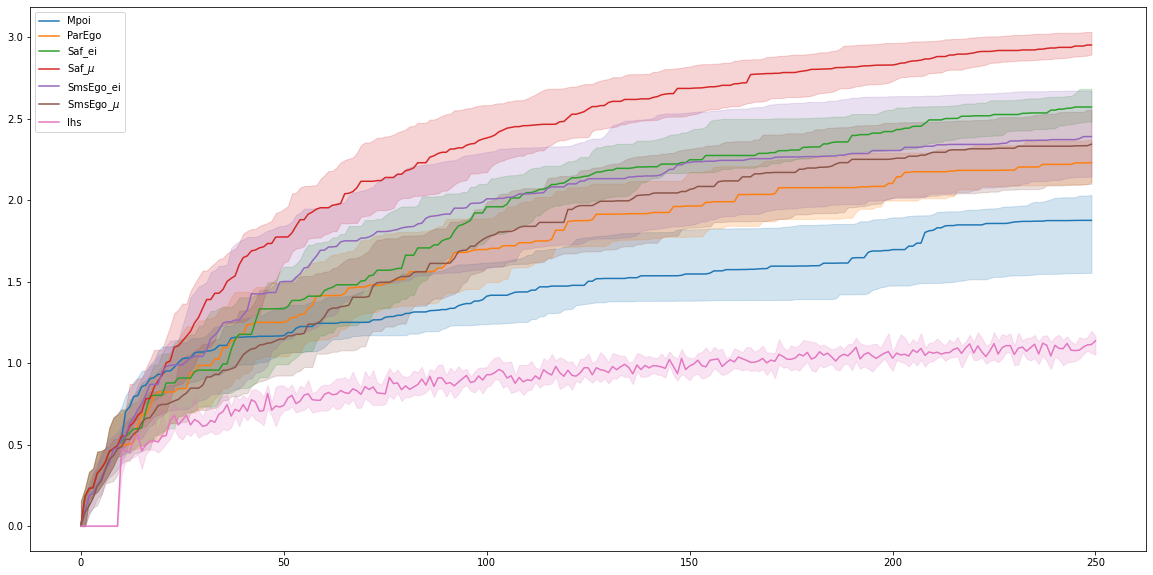

In [21]:
fig = plt.figure(figsize=[20, 10])
ax = fig.gca()
for color, key, d in zip(colors, D.keys(), D.values()):
    plot_measure(ax, 'hypervolume', d, key, c=color)
ax.legend()

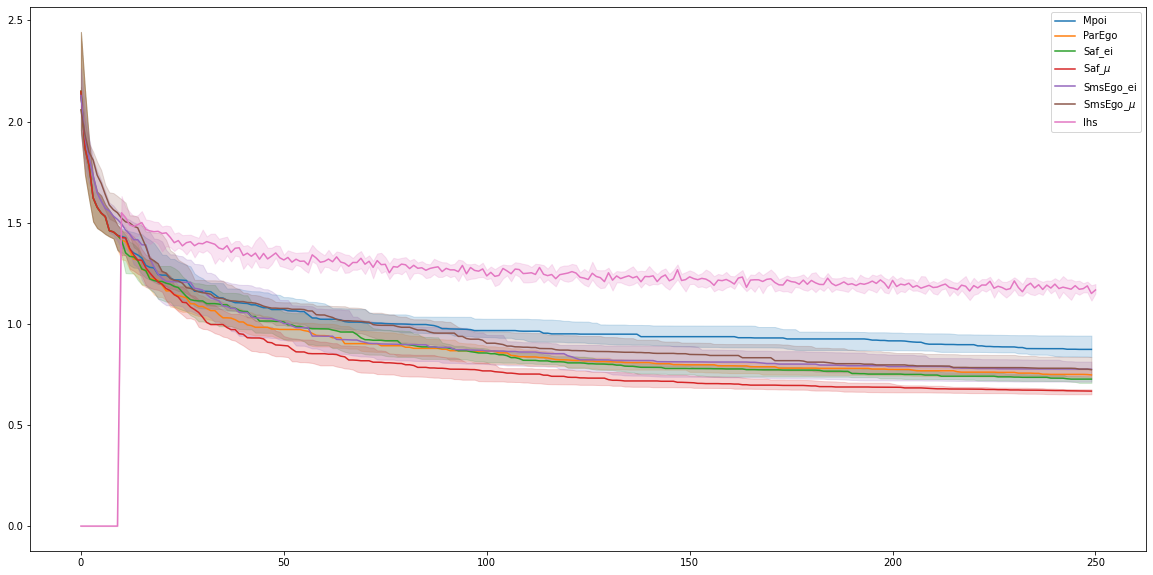

In [22]:
fig = plt.figure(figsize=[20, 10])
ax = fig.gca()
for color, key, d in zip(colors, D.keys(), D.values()):
    plot_measure(ax, 'igd+', d, key, c=color)
ax.legend()

In [24]:
from problem_setup import func, k, M

def objective_function(x):
    if x.ndim<2:
        x = x.reshape(1,-1)
    return np.array([func(xi, k, M) for xi in x])

In [27]:
import lhsmdu
limits = np.array(results[0]['limits'][0][1])
ss = np.array(lhsmdu.sample(numDimensions=6, numSamples=250).T)
ss2 = ss*limits
limits

array([ 2.,  4.,  6.,  8., 10., 12.])

In [29]:
ss_scat = objective_function(ss2)

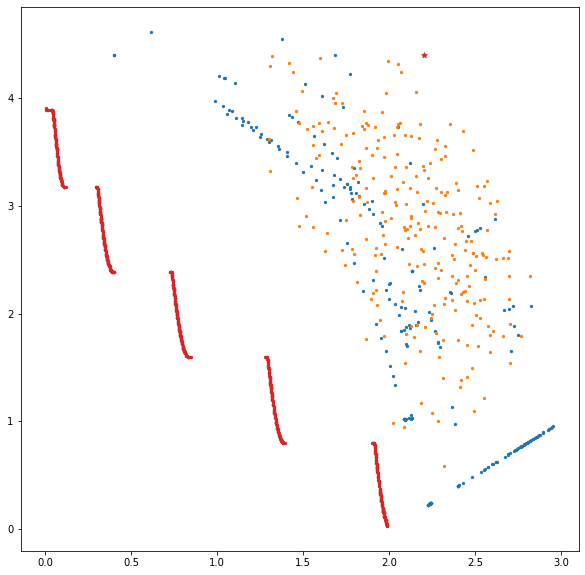

In [30]:
fig = plt.figure(figsize=[10,10])
ax = fig.gca()
ax.scatter(*p.T, c="C3", s=5)
ax.scatter(*ref_point, c="C3", marker="*", s=30)
ax.scatter(*results[0]['y'][0].T, s=5, c="C0")
# ax.scatter(*results[-1]['y'][5][-1].T, s=5, c="C2")
ax.scatter(*ss_scat.T, s=5, c="C1")